<a href="https://colab.research.google.com/github/CHBLESSY/Social-Media-Sentiment-Analysis/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
np.random.seed(0)
#from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt

#SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Test
from collections import Counter

In [9]:
path = "/content/drive/MyDrive/data set/twitter_training.csv"
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

#Test Data (Not to be used until the full model has been trained)
test_path = "/content/drive/MyDrive/data set/twitter_validation.csv"
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [8]:
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"], on_bad_lines='skip')
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"], on_bad_lines='skip')

In [10]:
train_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
train_df.head()
test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [14]:
train_df.shape

(73996, 4)

In [15]:
df = train_df.sample(frac=0.1)
df.reset_index(drop=True, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       7400 non-null   int64 
 1   Entity         7400 non-null   object
 2   Sentiment      7400 non-null   object
 3   Tweet_Content  7400 non-null   object
dtypes: int64(1), object(3)
memory usage: 231.4+ KB


In [17]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,Negative,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,Negative,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,Neutral,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,Negative,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,Negative,Collateral with the revolver is so satisfying....


In [18]:
print(df.isnull().sum())

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64


In [19]:
df.describe()

,Tweet_ID
count,7400.000000
mean,6446.105541
std,3715.986121
min,1.000000
25%,3247.000000
50%,6523.500000
75%,9578.250000
max,13200.000000


<BarContainer object of 4 artists>

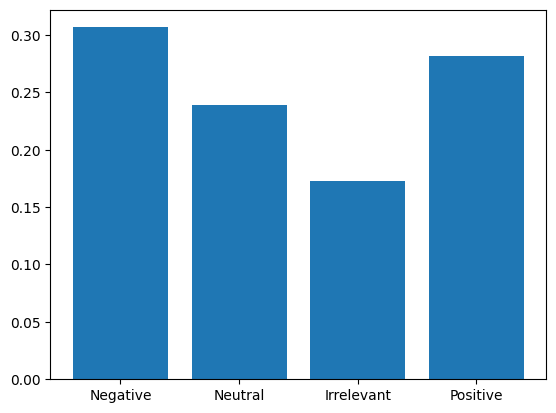

In [20]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums)

In [21]:
class_to_index = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive": 3}

#Creates a reverse dictionary
index_to_class = dict((v,k) for k, v in class_to_index.items())

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])

In [23]:
print(names_to_ids(["Positive", "Negative", "Irrelevant", "Neutral"]))
print(ids_to_names([0,1,2,3,4]))

[3 2 1 0]
['Neutral' 'Irrelevant' 'Negative' 'Positive' None]


In [24]:
df["Sentiment"] = names_to_ids(df["Sentiment"])

In [25]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....


In [30]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords') # Download the stopwords resource
nltk.download('wordnet') # Download the wordnet resource

def remove_stopwords(ls):
    #Lemmatises, then removes stop words
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stop_english) and (word.isalpha())]

    #Joins the words back into a single string
    ls = " ".join(ls)
    return ls

#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [31]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Tweet_Content_Split
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...,Borderlands Can big fix I reset entire factory...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...,GhostRecon You call update You laugh stay conn...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...,I excited watch EU closed qualifying match EU ...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed.",fortnite annoyed
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....,Collateral revolver unk


In [32]:
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [33]:
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))

In [34]:
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

In [35]:
tweet_tokens.shape

(7400, 50)

In [36]:
#Remove dependent variable
y = df["Sentiment"]

#Drop all non-useful columns
df = pd.DataFrame(tweet_tokens)

In [37]:
#Display final shape
df.shape

(7400, 50)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [39]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=15,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.3165 - loss: 1.3625 - val_accuracy: 0.4872 - val_loss: 1.2255
Epoch 2/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.5356 - loss: 1.1098 - val_accuracy: 0.5250 - val_loss: 1.1468
Epoch 3/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.6907 - loss: 0.7883 - val_accuracy: 0.5453 - val_loss: 1.1511
Epoch 4/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.7812 - loss: 0.5984 - val_accuracy: 0.5534 - val_loss: 1.2223
Epoch 5/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8417 - loss: 0.4377 - val_accuracy: 0.5689 - val_loss: 1.2392
Epoch 6/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.8837 - loss: 0.3431 - val_accuracy: 0.5716 - val_loss: 1.4182
Epoch 7/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9129 - loss: 0.2429 - val_accuracy: 0.5696 - val_loss: 1.5040
Epoch 8/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9214 - loss: 0.2284 - 

In [41]:
#Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


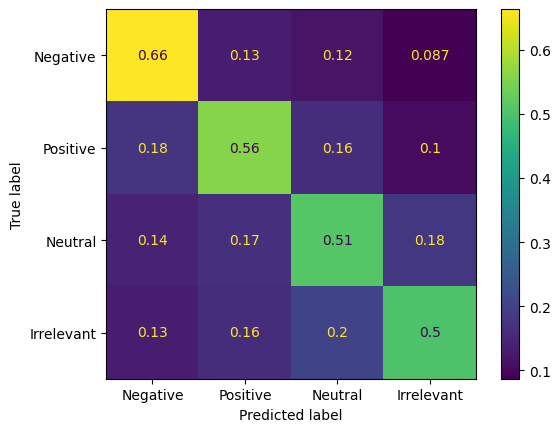

In [42]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [43]:
df = train_df

In [44]:
#Convert the "Sentiment" column into indexes

##Train
df["Sentiment"] = names_to_ids(df["Sentiment"])
y = df["Sentiment"]

##Test
test_df["Sentiment"] = names_to_ids(test_df["Sentiment"])
y_test = test_df["Sentiment"]

In [45]:
#Removing stopwords and lemmatising

##Train
#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

##Test
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)

test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [46]:
#Tokenisation

#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

##Train
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

##Test
#Tokenise our column of edited Tweet content
tweet_tokens_test = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))
tweet_tokens_test = pad_sequences(tweet_tokens_test, truncating = 'post', padding='post', maxlen=50)

In [47]:
#Final prep

##Train
#Drop all non-useful columns
full_df = pd.DataFrame(tweet_tokens)

##Test
full_test_df = pd.DataFrame(tweet_tokens_test)

In [48]:
#Original
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
h = model.fit(
     full_df, y,
     validation_data=(full_test_df, y_test),
     epochs=30,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 197s 85ms/step - accuracy: 0.7123 - loss: 0.7582 - val_accuracy: 0.2980 - val_loss: 1.3871
Epoch 2/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 195s 82ms/step - accuracy: 0.8223 - loss: 0.4798 - val_accuracy: 0.2890 - val_loss: 1.4152
Epoch 3/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 201s 82ms/step - accuracy: 0.8633 - loss: 0.3723 - val_accuracy: 0.2950 - val_loss: 1.3700
Epoch 4/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 201s 81ms/step - accuracy: 0.8802 - loss: 0.3218 - val_accuracy: 0.3010 - val_loss: 1.3862
Epoch 5/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 207s 83ms/step - accuracy: 0.8921 - loss: 0.2872 - val_accuracy: 0.3010 - val_loss: 1.3745
Epoch 6/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 189s 82ms/step - accuracy: 0.8995 - loss: 0.2607 - val_accuracy: 0.3200 - val_loss: 1.3750
Epoch 7/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 188s 81ms/step - accuracy: 0.9094 - loss: 0.2425 - val_accuracy: 0.2910 - val_loss: 1.3906
Epoch 8/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 206s 83ms/step - accuracy: 

In [52]:
y_pred = np.argmax(model.predict(full_test_df), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


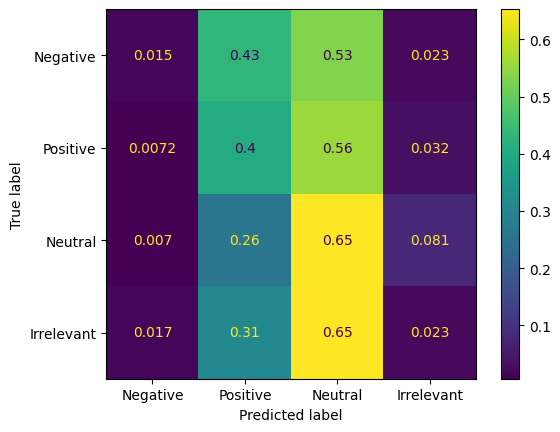

In [53]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [54]:
accuracy_score(y_test, y_pred)

0.306